# US Accidents Exploratory Data Analysis

* TODO_1: Talk about EDA(Exploratory Data Analysis)
* TODO_2: Talk about the dataset(sources, contents, how it could be usefull analysing it)
      Kaggle
      Information about Accidents
      Can be usefull analysing it to prevent accidents.

# Step_1: Select a large real-world dataset from Kaggle

In [14]:
pip install opendatasets --upgrade

Note: you may need to restart the kernel to use updated packages.


In [15]:
import opendatasets as od
download_url="https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents?fileType=csv&sizeStart=250%2CMB"
od.download(download_url)

Skipping, found downloaded files in ".\us-accidents" (use force=True to force download)


In [16]:
data_file= './us-accidents/US_Accidents_Dec21_updated.csv'

## Step_2: Data Preparation and cleaning
* Load the file using pandas
* Look at some information about the data & the columns
* fix any missing or incorrect values by various techniques

In [17]:
import pandas as pd

In [18]:
df= pd.read_csv(data_file)

In [19]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [8]:
len(df.columns)

47

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [10]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [10]:
### Find percentage of missing values per column

In [20]:
df.isnull().sum().sort_values(ascending=False)

Number                   1743911
Precipitation(in)         549458
Wind_Chill(F)             469643
Wind_Speed(mph)           157944
Wind_Direction             73775
Humidity(%)                73092
Weather_Condition          70636
Visibility(mi)             70546
Temperature(F)             69274
Pressure(in)               59200
Weather_Timestamp          50736
Airport_Code                9549
Timezone                    3659
Nautical_Twilight           2867
Civil_Twilight              2867
Sunrise_Sunset              2867
Astronomical_Twilight       2867
Zipcode                     1319
City                         137
Street                         2
Country                        0
Junction                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Turning_Loop                   0
Traffic_Signal                 0
Traffic_Calming                0
Stop                           0
Station                        0
Roundabout

In [12]:
missing_percentage=(df.isna().sum().sort_values(ascending=False)/len(df))*100

In [13]:
missing_percentage

Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Nautical_Twilight         0.100761
Civil_Twilight            0.100761
Sunrise_Sunset            0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
Country                   0.000000
Junction                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Turning_Loop              0.000000
Traffic_Signal            0.000000
Traffic_Calming           0.000000
Stop                

<AxesSubplot:>

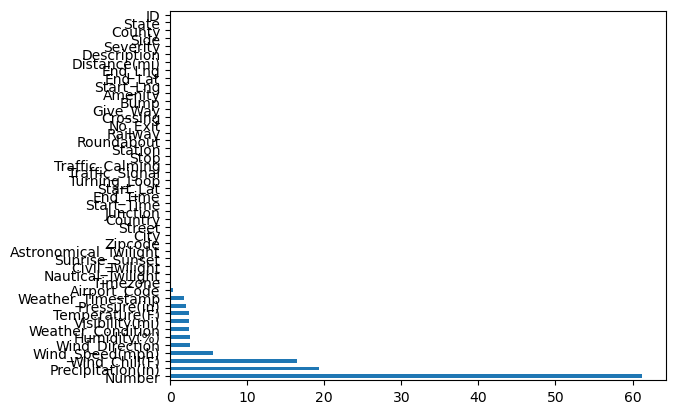

In [14]:
missing_percentage.plot(kind="barh")

In [15]:
missing_p_new=missing_percentage[missing_percentage !=0]## only gives those values which are missing

In [16]:
missing_p_new

Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Nautical_Twilight         0.100761
Civil_Twilight            0.100761
Sunrise_Sunset            0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
dtype: float64

<AxesSubplot:>

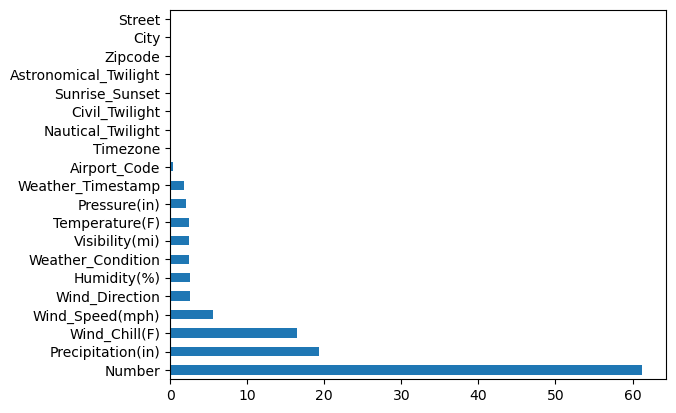

In [17]:
missing_p_new.plot(kind="barh")

In [18]:
## Let us check how many columns in our data_Set is numeric 

In [12]:
df.dtypes

ID                        object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity   

In [13]:
num_columns=df.select_dtypes(include=["int", "float"]).columns

In [14]:
num_columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Number', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)'],
      dtype='object')

In [15]:
len(num_columns) ##hence there are 14 columns that are of numeric type out of 47

14

In [23]:
## now lets consider a column "Traffic_Signal" which is of bool type and we ll try to convert it into int type with o=false and 1=true

In [16]:
df["Traffic_Signal"]=df["Traffic_Signal"].astype(int)

In [25]:
df.dtypes

ID                        object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity   

In [26]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,0,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,0,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,0,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,0,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,0,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,0,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,0,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,0,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,0,False,Day,Day,Day,Day


In [21]:
df["Traffic_Signal"].value_counts() ##it means there are 2580079 false rows in this column and 26563 true columns 

False    2580079
True      265263
Name: Traffic_Signal, dtype: int64

## Also here we can conclude that the data series of this perticular column is imbalanced so lets try to balance it inorder mode a costomized ML model

In [22]:
## By Upsampling:
df_majority=df[df["Traffic_Signal"]==0]
df_minority=df[df["Traffic_Signal"]==1]
from sklearn.utils import resample
df_minority_upsampled=resample(df_minority,replace=True, ##becoz we have to increase the data points
                               n_samples=len(df_majority),
                               random_state=42)

In [23]:
df_minority_upsampled.shape

(2580079, 47)

In [30]:
df_minority_upsampled.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
1575328,A-1575329,4,2021-02-21 05:52:12,2021-02-21 08:12:13,39.636984,-78.845420,39.637216,-78.847502,0.112,Incident on US-40 WB near MD-53 Road closed. T...,...,False,False,False,False,1,False,Night,Night,Night,Day
1855878,A-1855879,2,2020-10-26 03:51:47,2020-10-26 05:29:26,35.301205,-84.959157,35.301453,-84.959465,0.024,Incident on TN-60 near TN-58 Drive with caution.,...,False,False,False,False,1,False,Night,Night,Night,Night
1681077,A-1681078,2,2021-01-15 22:41:59,2021-01-16 00:17:55,33.795643,-117.992919,33.795948,-117.992921,0.021,Incident on BEACH BLVD near ORANGEWOOD AVE Dri...,...,False,False,False,False,1,False,Night,Night,Night,Night
2759022,A-2759023,2,2017-08-01 19:21:21,2017-08-02 01:21:21,40.676485,-73.821225,40.676491,-73.821280,0.003,At 117th St - Accident.,...,False,False,True,False,1,False,Day,Day,Day,Day
1553494,A-1553495,2,2021-02-27 05:22:30,2021-02-27 15:25:30,40.228873,-75.236694,40.234582,-75.240564,0.444,Stationary traffic on PA-309 from Knapp Rd to ...,...,False,False,False,False,1,False,Night,Night,Night,Day


In [26]:
df_upsampled=pd.concat([df_majority, df_minority_upsampled])

In [25]:
df_upsampled["Traffic_Signal"].value_counts() ## we have succesfully handles the imbalancenes by upsampling

False    2580079
True     2580079
Name: Traffic_Signal, dtype: int64

In [33]:
## similarly we can do downsampling just by using df_majority in resample fucntion and replace= TRUE bcoz we have to reduce the data

In [27]:
df_upsampled

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568388,A-1568389,2,2021-02-08 19:07:33.000000000,2021-02-08 20:51:09.000000000,42.153353,-87.961758,42.153299,-87.961901,0.008,Incident on LAKE COOK RD WB near BUFFALO GROVE...,...,False,False,False,False,True,False,Night,Night,Night,Night
544643,A-544644,2,2021-10-30 16:16:50,2021-10-30 17:31:51,37.542388,-77.372362,37.541937,-77.372975,0.046,Incident on NINE MILE RD near MEADOWSPRING RD ...,...,False,True,False,False,True,False,Day,Day,Day,Day
2266864,A-2266865,2,2020-04-20 20:27:04,2020-04-20 20:57:04,35.565550,-97.514750,35.565550,-97.514750,0.000,At NW Britton Rd - Accident.,...,False,False,False,False,True,False,Night,Day,Day,Day
423105,A-423106,2,2021-12-04 08:59:00,2021-12-04 10:29:53,28.538964,-81.310634,28.538322,-81.310627,0.044,Incident on S SEMORAN BLVD near LAKE UNDERHILL...,...,False,False,False,False,True,False,Day,Day,Day,Day


In [21]:
df_upsampled.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   2690538
Street                         2
Side                           0
City                         241
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    5478
Airport_Code               12747
Weather_Timestamp          77993
Temperature(F)            107600
Wind_Chill(F)             802494
Humidity(%)               114742
Pressure(in)               91767
Visibility(mi)            113844
Wind_Direction            124866
Wind_Speed(mph)           258209
Precipitation(in)         939995
Weather_Condition         113213
Amenity   

In [ ]:
## There is a column "Number" with 2690538 missing data, so either u can drop the entire column or if the feature is very importand lest handle so many missing values 

In [ ]:
## By mean imputation Technique

In [22]:
df_upsampled["Wind_Chill(F)_mean"]=df_upsampled["Wind_Chill(F)"].fillna(df_upsampled["Wind_Chill(F)"].mean())

In [23]:
df_upsampled.head() ## u can see a new column is created "Wind_Chill(F)_mean" that replaces "Wind_Chill(F)"

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Wind_Chill(F)_mean
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,0,False,Night,Night,Night,Night,36.100000
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,0,False,Night,Night,Night,Night,61.096738
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,0,False,Night,Night,Night,Day,61.096738
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,0,False,Night,Night,Day,Day,61.096738
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,0,False,Day,Day,Day,Day,29.800000


In [24]:
df_upsampled["Wind_Chill(F)_mean"].isnull().sum()

0

In [25]:
df_upsampled["Wind_Chill(F)"].isnull().sum()

802494

In [26]:
df_upsampled.dtypes

ID                        object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity   

In [27]:
## lets drop a column with max missing values

df_upsampled.drop("Civil_Twilight",axis=1,inplace=True)

In [28]:
df_upsampled.shape

(5160158, 47)

In [29]:
df_upsampled.info() ##"Civil_Twilight" deleted

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5160158 entries, 0 to 2009060
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [30]:
df_upsampled["Sunrise_Sunset"].value_counts()

Day      3351364
Night    1805374
Name: Sunrise_Sunset, dtype: int64

In [31]:
df_upsampled["Sunrise_Sunset"].unique()

array(['Night', 'Day', nan], dtype=object)

In [32]:
df_upsampled["Sunrise_Sunset"].isnull().sum()

3420

In [ ]:
## lsts manage this null values by mode imputation technique

In [33]:
mode_value=df_upsampled[df_upsampled["Sunrise_Sunset"].notna()]["Sunrise_Sunset"].mode()[0]

In [34]:
df_upsampled["Sunrise_Sunset_mode"]=df_upsampled["Sunrise_Sunset"].fillna(mode_value)

In [35]:
df_upsampled

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Nautical_Twilight,Astronomical_Twilight,Wind_Chill(F)_mean,Sunrise_Sunset_mode
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,0,False,Night,Night,Night,36.100000,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,0,False,Night,Night,Night,61.096738,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,0,False,Night,Night,Day,61.096738,Night
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,0,False,Night,Day,Day,61.096738,Night
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,0,False,Day,Day,Day,29.800000,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568388,A-1568389,2,2021-02-08 19:07:33.000000000,2021-02-08 20:51:09.000000000,42.153353,-87.961758,42.153299,-87.961901,0.008,Incident on LAKE COOK RD WB near BUFFALO GROVE...,...,False,False,False,1,False,Night,Night,Night,0.000000,Night
544643,A-544644,2,2021-10-30 16:16:50,2021-10-30 17:31:51,37.542388,-77.372362,37.541937,-77.372975,0.046,Incident on NINE MILE RD near MEADOWSPRING RD ...,...,True,False,False,1,False,Day,Day,Day,62.000000,Day
2266864,A-2266865,2,2020-04-20 20:27:04,2020-04-20 20:57:04,35.565550,-97.514750,35.565550,-97.514750,0.000,At NW Britton Rd - Accident.,...,False,False,False,1,False,Night,Day,Day,65.000000,Night
423105,A-423106,2,2021-12-04 08:59:00,2021-12-04 10:29:53,28.538964,-81.310634,28.538322,-81.310627,0.044,Incident on S SEMORAN BLVD near LAKE UNDERHILL...,...,False,False,False,1,False,Day,Day,Day,63.000000,Day


In [39]:
df_upsampled["Sunrise_Sunset_mode"].isnull().sum()

0

In [40]:
df_upsampled["Sunrise_Sunset"].isnull().sum()

3420

# Step_3: Exploratory data analysis and Visualizations

In [41]:
df_upsampled.columns


Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Wind_Chill(F)_mean', 'Sunrise_Sunset_mode'],
      dtype='object')

In [51]:
df_upsampled

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Nautical_Twilight,Astronomical_Twilight,Wind_Chill(F)_mean,Sunrise_Sunset_mode
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,0,False,Night,Night,Night,36.100000,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,0,False,Night,Night,Night,61.096738,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,0,False,Night,Night,Day,61.096738,Night
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,0,False,Night,Day,Day,61.096738,Night
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,0,False,Day,Day,Day,29.800000,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568388,A-1568389,2,2021-02-08 19:07:33.000000000,2021-02-08 20:51:09.000000000,42.153353,-87.961758,42.153299,-87.961901,0.008,Incident on LAKE COOK RD WB near BUFFALO GROVE...,...,False,False,False,1,False,Night,Night,Night,0.000000,Night
544643,A-544644,2,2021-10-30 16:16:50,2021-10-30 17:31:51,37.542388,-77.372362,37.541937,-77.372975,0.046,Incident on NINE MILE RD near MEADOWSPRING RD ...,...,True,False,False,1,False,Day,Day,Day,62.000000,Day
2266864,A-2266865,2,2020-04-20 20:27:04,2020-04-20 20:57:04,35.565550,-97.514750,35.565550,-97.514750,0.000,At NW Britton Rd - Accident.,...,False,False,False,1,False,Night,Day,Day,65.000000,Night
423105,A-423106,2,2021-12-04 08:59:00,2021-12-04 10:29:53,28.538964,-81.310634,28.538322,-81.310627,0.044,Incident on S SEMORAN BLVD near LAKE UNDERHILL...,...,False,False,False,1,False,Day,Day,Day,63.000000,Day


In [29]:
pd.set_option('display.max_columns', 48)

In [30]:
display(df_upsampled)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568388,A-1568389,2,2021-02-08 19:07:33.000000000,2021-02-08 20:51:09.000000000,42.153353,-87.961758,42.153299,-87.961901,0.008,Incident on LAKE COOK RD WB near BUFFALO GROVE...,2.0,E Lake Cook Rd,L,Buffalo Grove,Cook,IL,60089,US,US/Central,KPWK,2021-02-08 19:04:00,11.0,0.0,81.0,29.59,1.0,NW,7.0,0.00,Light Snow,False,False,True,False,False,False,False,False,False,False,False,True,False,Night,Night,Night,Night
544643,A-544644,2,2021-10-30 16:16:50,2021-10-30 17:31:51,37.542388,-77.372362,37.541937,-77.372975,0.046,Incident on NINE MILE RD near MEADOWSPRING RD ...,4512.0,Nine Mile Rd,R,Richmond,Henrico,VA,23223-4905,US,US/Eastern,KRIC,2021-10-30 15:54:00,62.0,62.0,65.0,29.37,10.0,SSW,8.0,0.00,Mostly Cloudy,False,False,False,False,False,False,False,False,True,False,False,True,False,Day,Day,Day,Day
2266864,A-2266865,2,2020-04-20 20:27:04,2020-04-20 20:57:04,35.565550,-97.514750,35.565550,-97.514750,0.000,At NW Britton Rd - Accident.,NaN,E Britton Rd,R,Oklahoma City,Oklahoma,OK,73114,US,US/Central,KPWA,2020-04-20 20:39:00,65.0,65.0,68.0,28.52,10.0,SSW,5.0,0.02,Light Rain with Thunder,False,False,True,False,False,False,False,False,False,False,False,True,False,Night,Day,Day,Day
423105,A-423106,2,2021-12-04 08:59:00,2021-12-04 10:29:53,28.538964,-81.310634,28.538322,-81.310627,0.044,Incident on S SEMORAN BLVD near LAKE UNDERHILL...,5698.0,Lake Underhill Rd,R,Orlando,Orange,FL,32807-1647,US,US/Eastern,KORL,2021-12-04 08:53:00,63.0,63.0,84.0,30.06,10.0,NNW,3.0,0.00,Fair,Fal

## Columns we ll analyze:
   1. City 
   2. Start Time  
   3. Start lat, Start lng
   4. Temprature
   5. weather condition

## City

In [31]:
df_upsampled.City

0                 Dublin
1                 Dayton
2             Cincinnati
3                  Akron
4             Cincinnati
               ...      
1568388    Buffalo Grove
544643          Richmond
2266864    Oklahoma City
423105           Orlando
2009060            Tampa
Name: City, Length: 5160158, dtype: object

In [32]:
cities=df_upsampled.City.unique()

In [33]:
len(cities)

11682

In [46]:
## There are around 11600 cities in the dataset

In [34]:
cities_by_accidents= df_upsampled.City.value_counts()

In [35]:
cities_by_accidents

Miami          224468
Los Angeles    136408
Orlando        125900
Charlotte      110924
Dallas          97762
                ...  
Fort Knox           1
Gracemont           1
Mc Clelland         1
Binger              1
Borden              1
Name: City, Length: 11681, dtype: int64

In [37]:
cities_by_accidents[:20] ##top 20 cities with highest accidents

Miami          224468
Los Angeles    136408
Orlando        125900
Charlotte      110924
Dallas          97762
Houston         80257
Raleigh         62471
Tucson          54378
Sacramento      50985
Phoenix         50542
Austin          48202
San Diego       41678
Richmond        39025
Portland        38403
Baton Rouge     37940
Nashville       36204
Minneapolis     33791
New Orleans     29713
Chicago         28159
Rochester       28137
Name: City, dtype: int64

In [38]:
list(cities_by_accidents)[:20]

[224468,
 136408,
 125900,
 110924,
 97762,
 80257,
 62471,
 54378,
 50985,
 50542,
 48202,
 41678,
 39025,
 38403,
 37940,
 36204,
 33791,
 29713,
 28159,
 28137]

In [56]:
"New York" in df_upsampled.City

False

In [57]:
df_upsampled.State

0          OH
1          OH
2          OH
3          OH
4          OH
           ..
1568388    IL
544643     VA
2266864    OK
423105     FL
2009060    FL
Name: State, Length: 5160158, dtype: object

In [58]:
"NY" in df_upsampled.State

False

In [59]:
## New york, which is city with highest populaton is not in the dataset of us accidents

<AxesSubplot:>

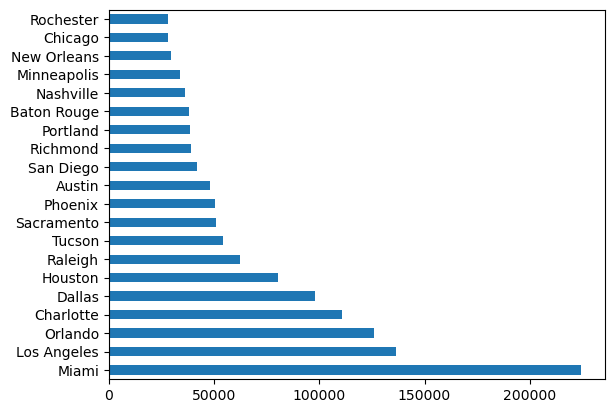

In [66]:

cities_by_accidents[:20].plot(kind="barh")

<AxesSubplot:ylabel='City'>

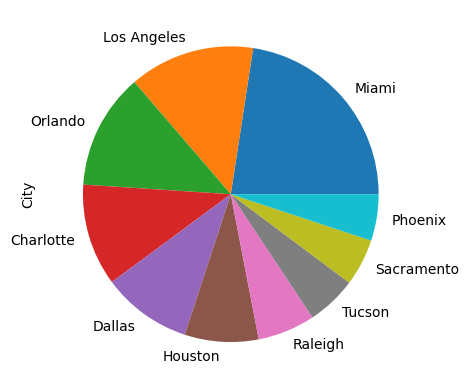

In [65]:
cities_by_accidents[:10].plot(kind="pie")

In [39]:
import seaborn as sns
sns.set_style("darkgrid")

C:\Users\risha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

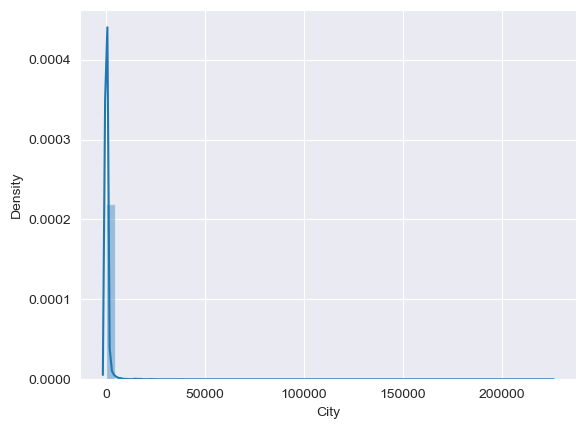

In [40]:
sns.distplot(cities_by_accidents)

In [42]:
high_accidents_cities= cities_by_accidents[cities_by_accidents>=1000]
low_accidents_cities= cities_by_accidents[cities_by_accidents<1000]

In [43]:
high_accidents_cities

Miami              224468
Los Angeles        136408
Orlando            125900
Charlotte          110924
Dallas              97762
                    ...  
Bothell              1002
Central Point        1002
Chiloquin            1000
Oakland Gardens      1000
Towson               1000
Name: City, Length: 826, dtype: int64

In [44]:
low_accidents_cities

Germantown     991
Rego Park      989
La Grange      988
Plymouth       985
Warren         985
              ... 
Fort Knox        1
Gracemont        1
Mc Clelland      1
Binger           1
Borden           1
Name: City, Length: 10855, dtype: int64

In [49]:
# percentage to high accident cities
(len(high_accidents_cities)/len(cities))*100

7.07070707070707

C:\Users\risha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

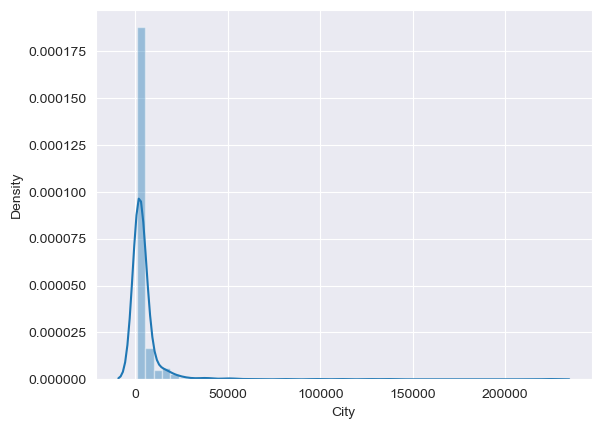

In [46]:
sns.distplot(high_accidents_cities)

In [50]:
# percentage to low accident cities
(len(low_accidents_cities)/len(cities))*100

92.92073275124123

C:\Users\risha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

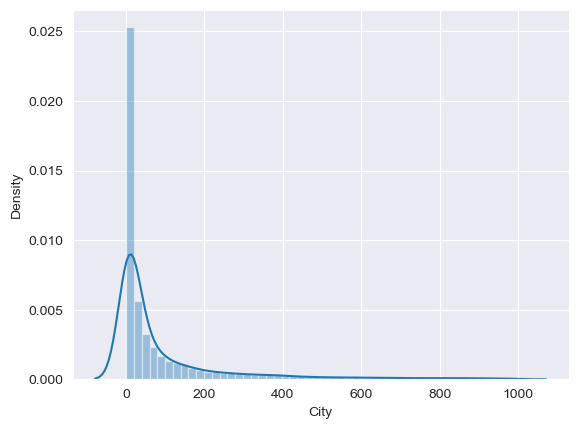

In [48]:
sns.distplot(low_accidents_cities)

In [55]:
cities_by_accidents[cities_by_accidents==1]

Kill Buck       1
Duncombe        1
Cotuit          1
Honey Creek     1
Leonardville    1
               ..
Fort Knox       1
Gracemont       1
Mc Clelland     1
Binger          1
Borden          1
Name: City, Length: 1051, dtype: int64

In [56]:
## 1051 cities reported only 1 accident

## Strat Time

In [58]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

In [82]:
df_upsampled["Start_Time"]=pd.to_datetime(df_upsampled["Start_Time"])

In [83]:
df_upsampled.dtypes

ID                               object
Severity                          int64
Start_Time               datetime64[ns]
End_Time                         object
Start_Lat                       float64
Start_Lng                       float64
End_Lat                         float64
End_Lng                         float64
Distance(mi)                    float64
Description                      object
Number                          float64
Street                           object
Side                             object
City                             object
County                           object
State                            object
Zipcode                          object
Country                          object
Timezone                         object
Airport_Code                     object
Weather_Timestamp                object
Temperature(F)                  float64
Wind_Chill(F)                   float64
Humidity(%)                     float64
Pressure(in)                    float64


In [88]:
df_upsampled["Start_Time"]

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:51:45
4         2016-02-08 07:53:43
                  ...        
1568388   2021-02-08 19:07:33
544643    2021-10-30 16:16:50
2266864   2020-04-20 20:27:04
423105    2021-12-04 08:59:00
2009060   2020-12-10 02:13:00
Name: Start_Time, Length: 5160158, dtype: datetime64[ns]

In [89]:
df_upsampled["Start_Time"][0]

Timestamp('2016-02-08 00:37:08')

In [93]:
## lets print only hour
accidents_hours=df_upsampled["Start_Time"].dt.hour

In [94]:
accidents_hours

0           0
1           5
2           6
3           6
4           7
           ..
1568388    19
544643     16
2266864    20
423105      8
2009060     2
Name: Start_Time, Length: 5160158, dtype: int64

C:\Users\risha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

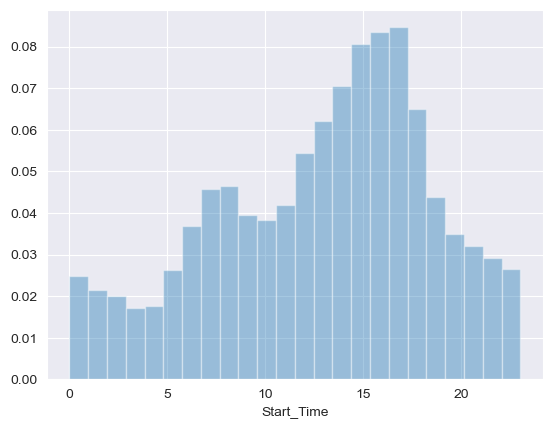

In [97]:
sns.distplot(accidents_hours,bins=24,norm_hist=True, kde=False)

* Most of the accidents happen between 4-5 pm, and may be bcoz people are in hurry to go back home ater their work

In [101]:
accidents_by_day_of_week=df_upsampled["Start_Time"].dt.dayofweek

In [102]:
accidents_by_day_of_week

0          0
1          0
2          0
3          0
4          0
          ..
1568388    0
544643     5
2266864    0
423105     5
2009060    3
Name: Start_Time, Length: 5160158, dtype: int64

C:\Users\risha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

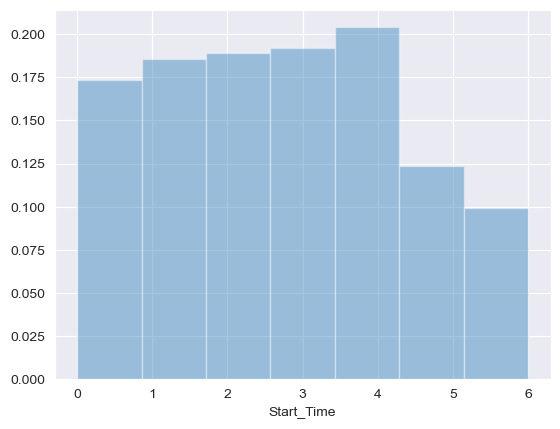

In [103]:
sns.distplot(accidents_by_day_of_week,bins=7,norm_hist=True, kde=False)

* So on weekeds no of accidents are low as compared to normal days

In [110]:
accidents_by_day_of_sunday=df_upsampled["Start_Time"].dt.dayofweek==6

In [111]:
accidents_by_day_of_sunday

0          False
1          False
2          False
3          False
4          False
           ...  
1568388    False
544643     False
2266864    False
423105     False
2009060    False
Name: Start_Time, Length: 5160158, dtype: bool